# Random Forest Classification - Diabetes Dataset

## Data Dictionary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF 
from feature_engine.outliers import Winsorizer
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("C:/Users/delll/Desktop/Python/DataSets/Diabetes2.csv")
df.head()

,preganices,glucose,blood pressure,skin thickness,insulin,BMI,DiabetesPedigreefunction,age,Target
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [41]:
df.shape

(768, 9)

rows=768 columns=9

In [42]:
df.dtypes

preganices                    int64
glucose                       int64
blood pressure                int64
skin thickness                int64
insulin                       int64
BMI                         float64
DiabetesPedigreefunction    float64
age                           int64
Target                       object
dtype: object

In [43]:
df.columns

Index(['preganices', 'glucose', 'blood pressure', 'skin thickness', 'insulin',
       'BMI', 'DiabetesPedigreefunction', 'age', 'Target'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   preganices                768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   blood pressure            768 non-null    int64  
 3   skin thickness            768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   Target                    768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [45]:
df.isnull().sum()

preganices                  0
glucose                     0
blood pressure              0
skin thickness              0
insulin                     0
BMI                         0
DiabetesPedigreefunction    0
age                         0
Target                      0
dtype: int64

There is no null records

In [46]:
df.describe()

,preganices,glucose,blood pressure,skin thickness,insulin,BMI,DiabetesPedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


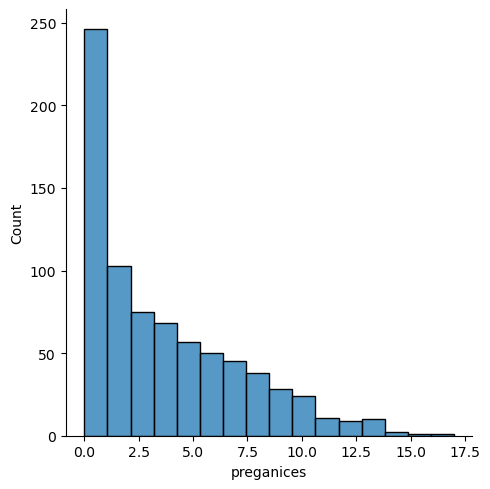

In [47]:
sns.displot(df["preganices"])
plt.show()

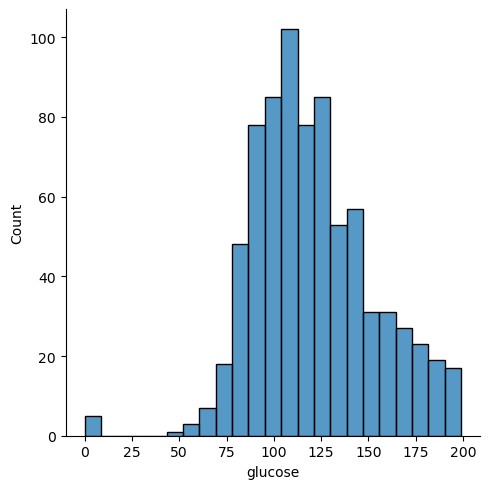

In [25]:
sns.displot(df["glucose"])
plt.show()

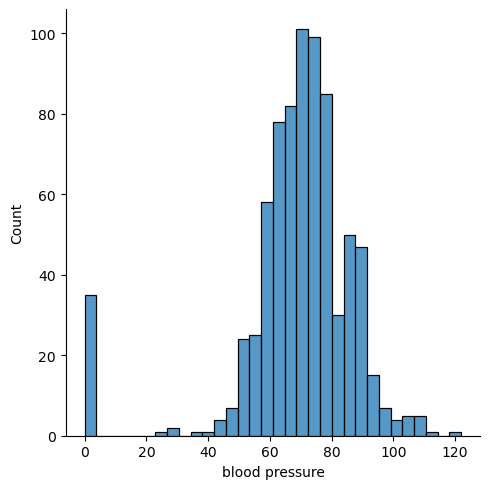

In [26]:
sns.displot(df["blood pressure"])
plt.show()

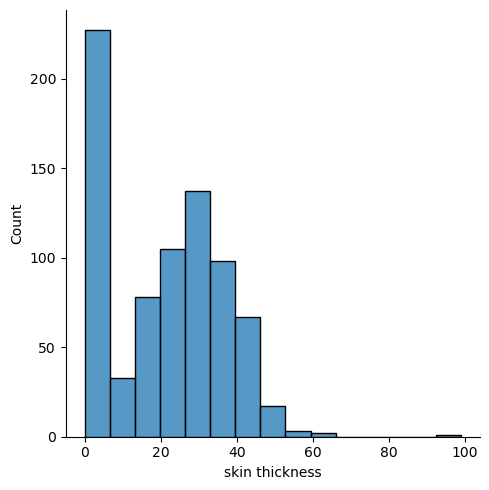

In [27]:
sns.displot(df["skin thickness"])
plt.show()

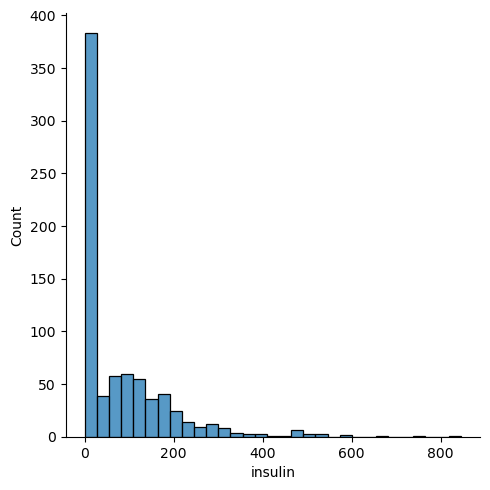

In [28]:
sns.displot(df["insulin"])
plt.show()

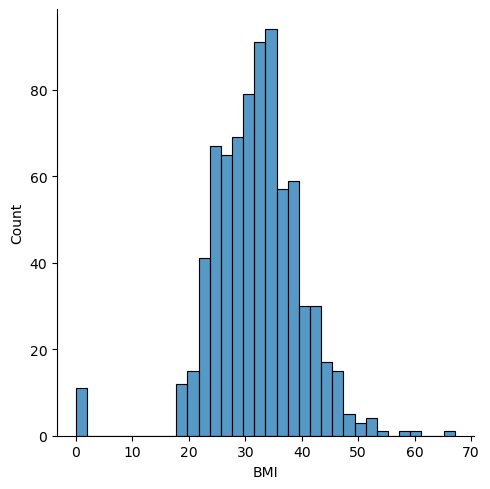

In [29]:
sns.displot(df["BMI"])
plt.show()

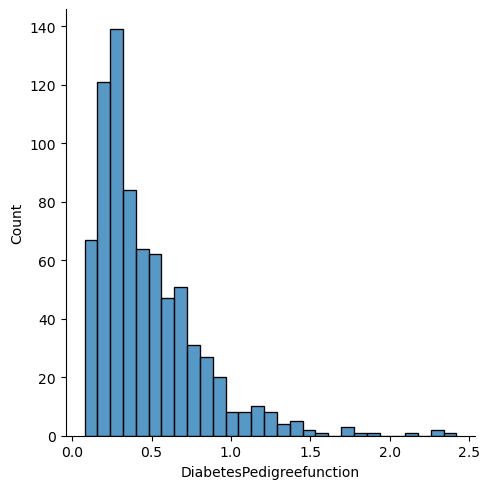

In [30]:
sns.displot(df["DiabetesPedigreefunction"])
plt.show()

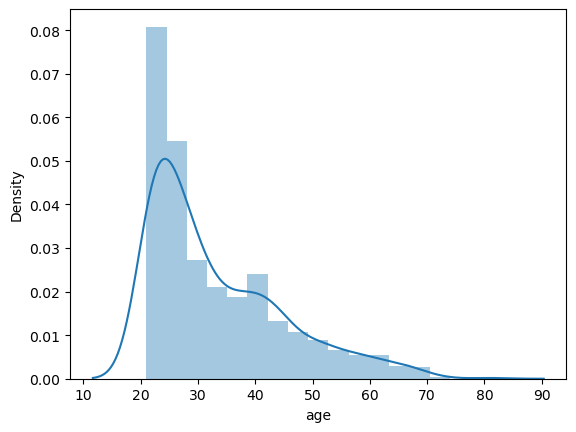

In [48]:
sns.distplot(df["age"])
plt.show()

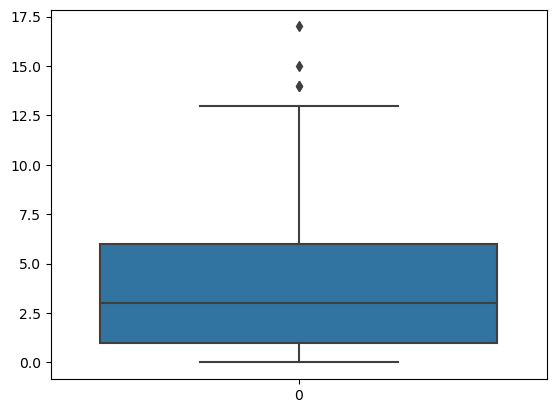

In [32]:
sns.boxplot(df["preganices"])
plt.show()

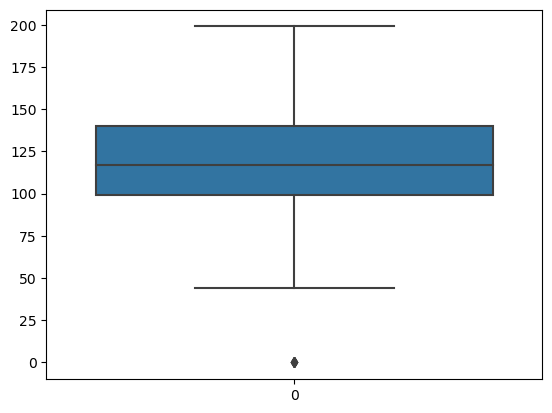

In [33]:
sns.boxplot(df["glucose"])
plt.show()

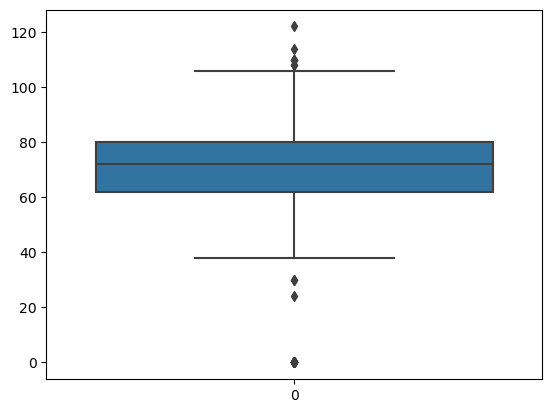

In [34]:
sns.boxplot(df["blood pressure"])
plt.show()

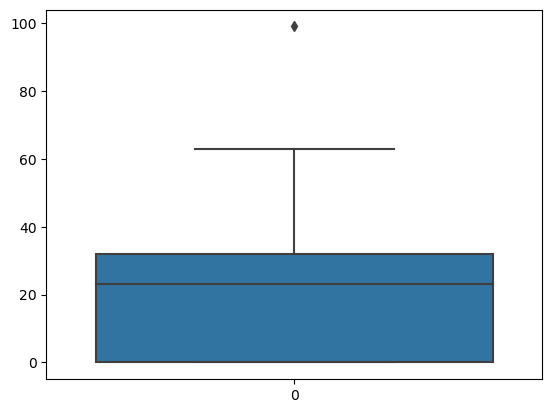

In [35]:
sns.boxplot(df["skin thickness"])
plt.show()

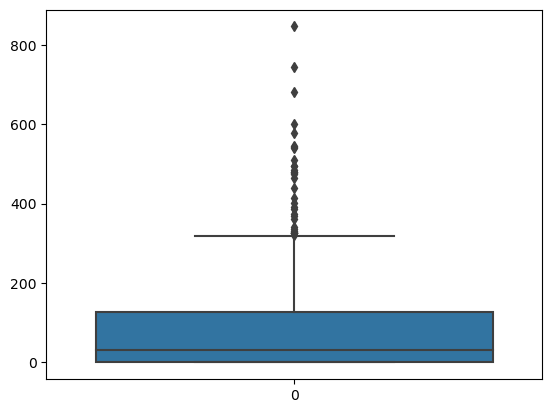

In [36]:
sns.boxplot(df["insulin"])
plt.show()

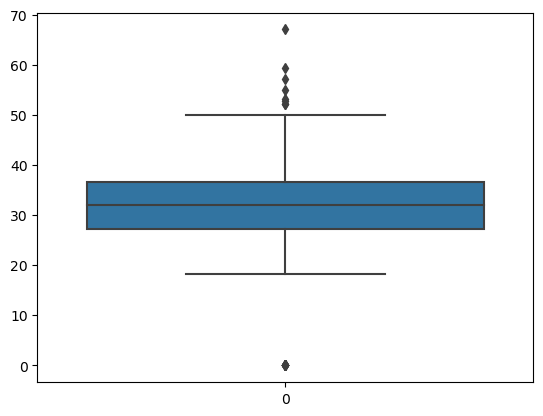

In [37]:
sns.boxplot(df["BMI"])
plt.show()

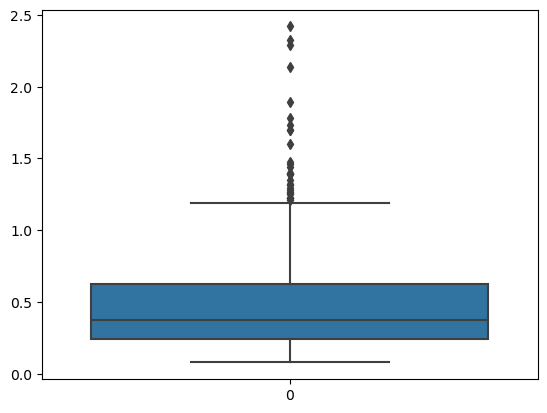

In [38]:
sns.boxplot(df["DiabetesPedigreefunction"])
plt.show()

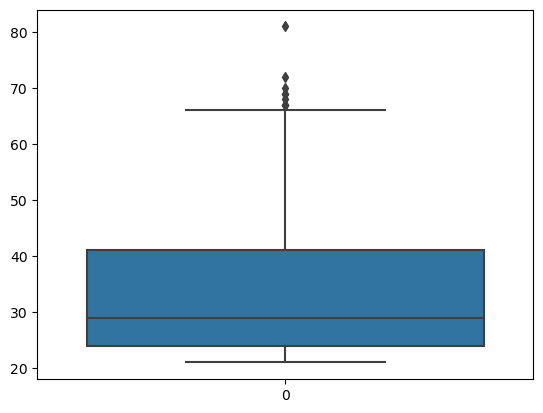

In [49]:
sns.boxplot(df["age"])
plt.show()

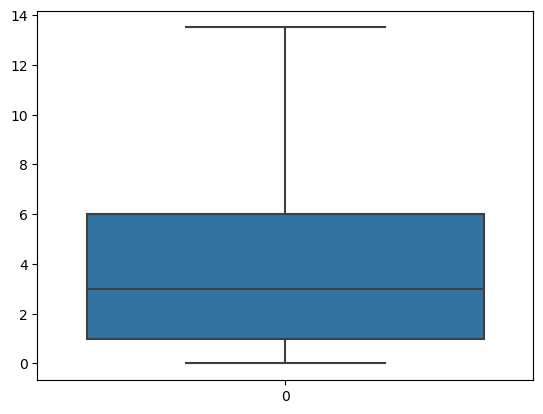

In [63]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["preganices"],tail="both")
df["preganices"]=winsor.fit_transform(df[["preganices"]])
sns.boxplot(df["preganices"])
plt.show()

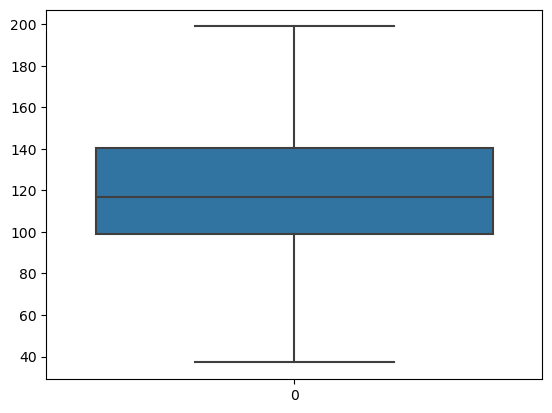

In [62]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["glucose"],tail="both")
df["glucose"]=winsor.fit_transform(df[["glucose"]])
sns.boxplot(df["glucose"])
plt.show()

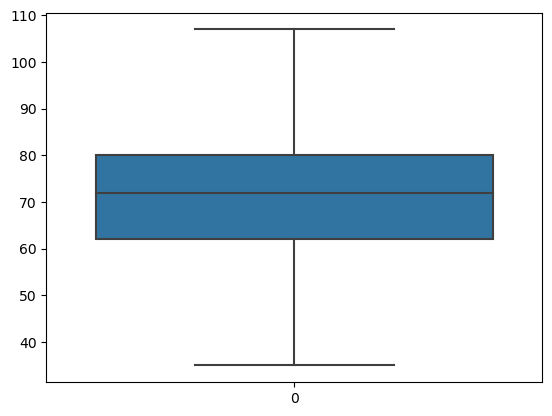

In [61]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["blood pressure"],tail="both")
df["blood pressure"]=winsor.fit_transform(df[["blood pressure"]])
sns.boxplot(df["blood pressure"])
plt.show()

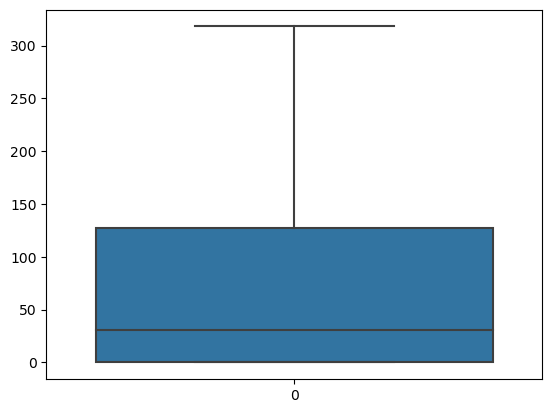

In [60]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["insulin"],tail="both")
df["insulin"]=winsor.fit_transform(df[["insulin"]])
sns.boxplot(df["insulin"])
plt.show()

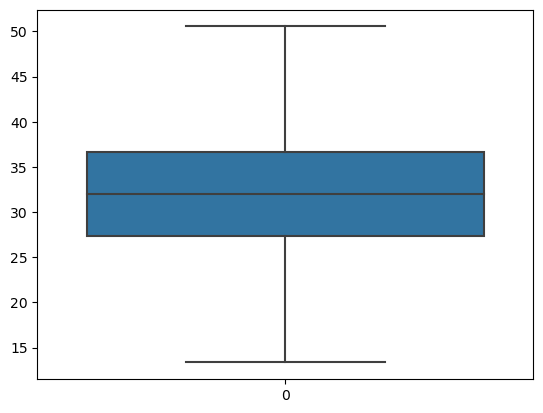

In [59]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["BMI"],tail="both")
df["BMI"]=winsor.fit_transform(df[["BMI"]])
sns.boxplot(df["BMI"])
plt.show()

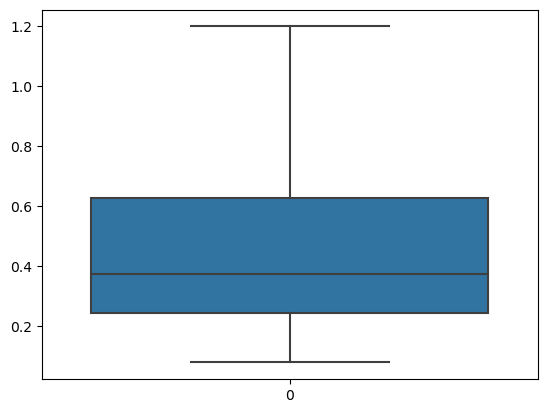

In [58]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["DiabetesPedigreefunction"],tail="both")
df["DiabetesPedigreefunction"]=winsor.fit_transform(df[["DiabetesPedigreefunction"]])
sns.boxplot(df["DiabetesPedigreefunction"])
plt.show()

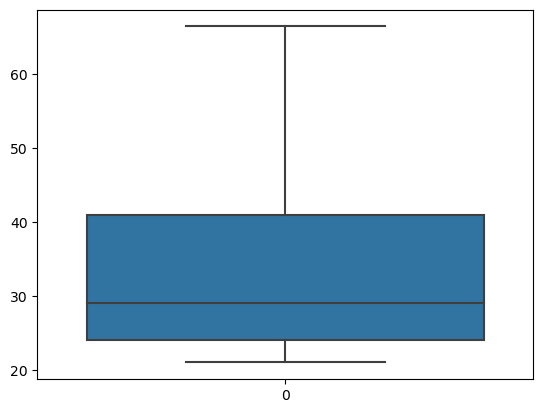

In [57]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["age"],tail="both")
df["age"]=winsor.fit_transform(df[["age"]])
sns.boxplot(df["age"])
plt.show()

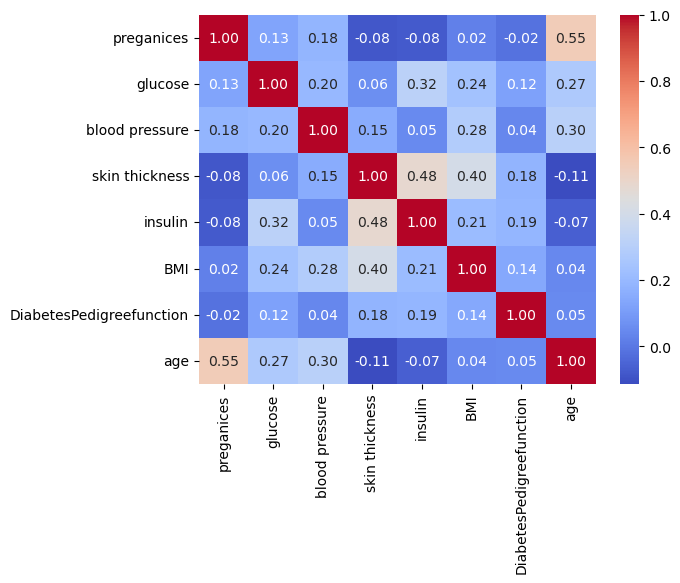

In [64]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

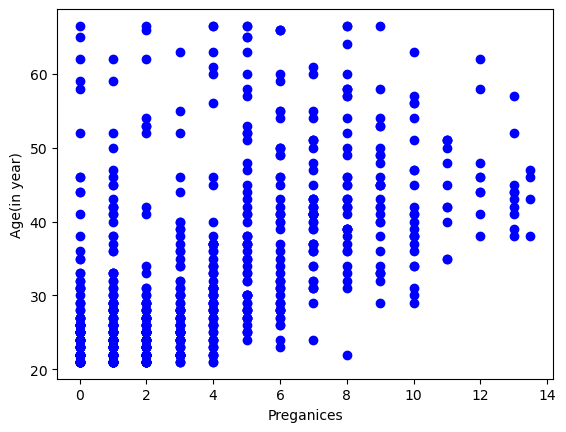

In [65]:
plt.scatter(df["preganices"],df["age"],color="blue")
plt.xlabel("Preganices")
plt.ylabel("Age(in year)")
plt.show()

In [66]:
le=LabelEncoder()
df["Target"]=le.fit_transform(df["Target"])

In [67]:
x=df.drop(["Target"],axis=1)
y=df["Target"]

In [68]:
x.head()

,preganices,glucose,blood pressure,skin thickness,insulin,BMI,DiabetesPedigreefunction,age
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0


In [69]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Target, Length: 768, dtype: int32

## Split the Dataset

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [71]:
model=RF()

In [72]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [77]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[134,  22],
       [ 38,  37]], dtype=int64)

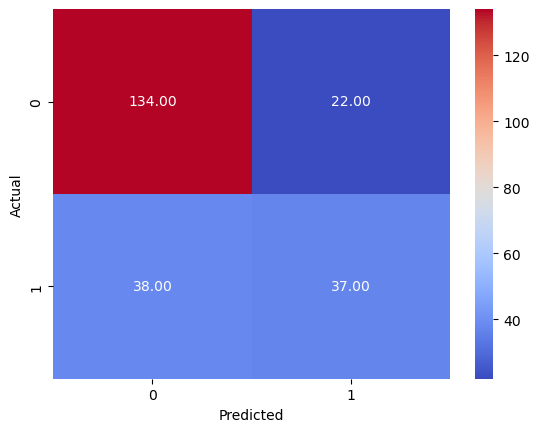

In [75]:
sns.heatmap(cm,annot=True,cmap="coolwarm",fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [76]:
acc=accuracy_score(y_test,y_pred)
acc

0.7402597402597403

# Conclusion